## Data Preprocess

This section involves all the steps required so that the dataset is in a suitanle format for the subsequent tasks.<br>
The steps are listed in the followings:


#### 1. Data understanding:
Gain basic understanding of the CIC-DDoS2019 dataset to proceed advanced pre-processing
  
#### 2. Data cleaning:
Remove infinity values (if is existed), duplicated values, etc.

  
#### 3. Data transformation
Address imbalanced data, encoding data, etc
  
#### 4.  Save the preprocessed data
For subsequent use
  

In [ ]:
import pandas as pd
import numpy as np

# Encode target variables
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# resampling
from typing import List
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import downsampled dataset

CICDDoS2019_multi = pd.read_csv(r'Dataset/Initial Dataset/CICDDoS2019.csv')

### 1. Data understanding

In [ ]:
info = CICDDoS2019_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336457 entries, 0 to 336456
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    336457 non-null  int64  
 1   Flow ID                       336457 non-null  object 
 2    Source IP                    336457 non-null  object 
 3    Source Port                  336457 non-null  int64  
 4    Destination IP               336457 non-null  object 
 5    Destination Port             336457 non-null  int64  
 6    Protocol                     336457 non-null  int64  
 7    Timestamp                    336457 non-null  object 
 8    Flow Duration                336457 non-null  int64  
 9    Total Fwd Packets            336457 non-null  int64  
 10   Total Backward Packets       336457 non-null  int64  
 11  Total Length of Fwd Packets   336457 non-null  float64
 12   Total Length of Bwd Packets  336457 non-nul

In [ ]:
CICDDoS2019_multi.shape

(336457, 88)

In [ ]:
print(f"Number of rows: {CICDDoS2019_multi.shape[0]}")
print(f"Number of columns: {CICDDoS2019_multi.shape[1]}")

Number of rows: 336457
Number of columns: 88


In [ ]:
print("Columns in the dataset:")
CICDDoS2019_multi.columns

Columns in the dataset:


Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

Class distribution:


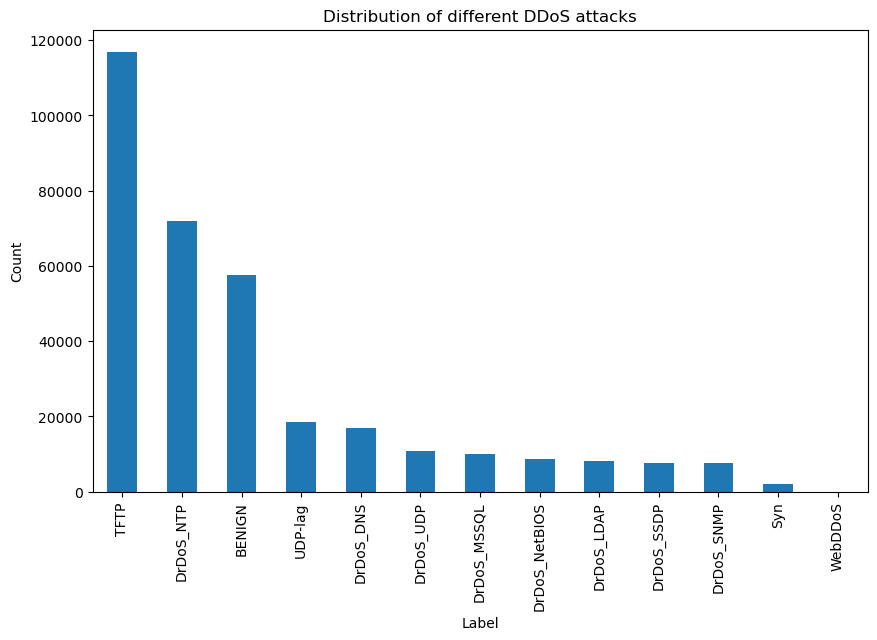

In [ ]:
# to visualize the Class distribution of DDoS Attacks

print('Class distribution:')
Class_Distribution = CICDDoS2019_multi[' Label'].value_counts()


plt.figure(figsize=(10, 6))
Class_Distribution.plot(kind='bar')
plt.title('Distribution of different DDoS attacks')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

As it can be observed that the distribution is highly imbalanced, will require steps to address this issue

### To detect zero value

In [ ]:
# check if there is any column containing all zero values


all_zero_columns = []

for col_name in CICDDoS2019_multi.columns:
    if (CICDDoS2019_multi[col_name] == 0).all():
        all_zero_columns.append(col_name)

print(f"Columns containing all zero values:\n{all_zero_columns}")
# print(all_zero_columns)

Columns containing all zero values:
[' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


Column with all zero values typically do not contribute useful information to a machine learning model and can potentially impact its accuracy which may introduce noise and affect the model's ability to learn meaningful patterns from the data.

### To check if there are any duplicated rows

In [ ]:
CICDDoS2019_duplicates = CICDDoS2019_multi[CICDDoS2019_multi.duplicated()]
CICDDoS2019_duplicates.shape

(2495, 88)

In [ ]:
dataset_duplicates = CICDDoS2019_multi[CICDDoS2019_multi.duplicated()]
print(f"{dataset_duplicates.shape[0]} out of {CICDDoS2019_multi.shape[0]} rows are duplicates")
print(f"{dataset_duplicates.shape[0]/CICDDoS2019_multi.shape[0]*100:.2f}% of rows are duplicates")

2495 out of 336457 rows are duplicates
0.74% of rows are duplicates


The dataset contains duplicated value which needs to be addressed as to prevent  introducing biases and artificially inflating the representation of specific samples


### To check for Infinity values

In [ ]:
# As the current dataset contain different datatypes, select and check only suitable (numerical) data type


# Select columns with numerical data types
columns = CICDDoS2019_multi.select_dtypes(include=[np.number])

# Check for infinity values in the selected columns
inf_mask = np.isinf(columns).any(axis=1)  # Mask indicating columns with infinity values
total_inf_rows = inf_mask.sum()  # Total number of columns with infinity values

print("Total number of columns with infinity values:", total_inf_rows)

# Calculate the percentage of rows containing infinity values
percentage = total_inf_rows / CICDDoS2019_multi.shape[0] * 100
print(f"Percentage of rows with infinity values: {percentage:.2f}%")


Total number of columns with infinity values: 5165
Percentage of rows with infinity values: 1.54%


### To check for Nan/missing values

In [ ]:
nan_columns = CICDDoS2019_multi.columns[CICDDoS2019_multi.isna().any()].tolist()
nan_count = CICDDoS2019_multi.isna().any(axis=1).sum()

print("Columns with NaN values:", nan_columns)
print("Number of rows with NaN values:", nan_count)


Columns with NaN values: ['Flow Bytes/s']
Number of rows with NaN values: 2344


### Encoding

In [ ]:
# Select the column for one-hot encoding
column_to_encode = ' Label'

# Extract the column as a dataframe
df = CICDDoS2019_multi[[column_to_encode]]

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the dataframe
encoded_data = encoder.fit_transform(df)

# Create a new dataframe with the encoded columns
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out([column_to_encode]))

# Drop the original 'Label' column from CICDDoS2019_train
CICDDoS2019_multi.drop([column_to_encode], axis=1, inplace=True)

# Concatenate CICDDoS2019_train and encoded_df
CICDDoS2019 = pd.concat([CICDDoS2019_multi, encoded_df], axis=1)



### Data cleaning

### Remove rows contain `missing` value

In [ ]:
pd.set_option('display.max_column', None)

CICDDoS2019.dropna(inplace=True)
CICDDoS2019

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label_BENIGN,Label_DrDoS_DNS,Label_DrDoS_LDAP,Label_DrDoS_MSSQL,Label_DrDoS_NTP,Label_DrDoS_NetBIOS,Label_DrDoS_SNMP,Label_DrDoS_SSDP,Label_DrDoS_UDP,Label_Syn,Label_TFTP,Label_UDP-lag,Label_WebDDoS
0,0,192.168.50.7-23.32.166.121-52380-443-6,192.168.50.7,52380,23.32.166.121,443,6,2018-12-01 13:34:28.579374,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,0.0,0.0,0.00,0.0,0.00,0,0,0,0,0,1,1,0,0.0,0.00,0.000000,0.0,40,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443,192.168.50.7,52380,6,2018-12-01 13:34:28.605293,2,3,0,62.0,0.0,31.0,0.0,20.666667,17.897858,0.0,0.0,0.0,0.0,3.100000e+07,1.500000e+06,1.000000e+00,0.000000e+00,1.0,1.0,2.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,60,0,1.500000e+06,0.000000,0.0,31.0,23.25,15.5,240.25,0,0,1,0,0,1,0,0,0.0,31.00,20.666667,0.0,60,0,0,0,0,0,0,3,62,0,0,245,-1,1,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64469,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443,192.168.50.7,52380,6,2018-12-01 13:34:28.605296,218,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,1.376147e+04,1.090000e+02,8.626703e+01,170.0,48.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,0,20,40,4.587156e+03,9174.311927,0.0,0.0,0.00,0.0,0.00,0,0,0,0,0,1,1,0,2.0,0.00,0.000000,0.0,20,0,0,0,0,0,0,1,0,2,0,245,0,0,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,171,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 13:34:28.716014,115366430,52,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,4.507377e-01,2.262087e+06,4.120832e+06,9988327.0,1.0,115366430.0,2.262087e+06,4.120832e+06,9988327.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4.507377e-01,0.000000,0.0,0.0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0.0,0.00,0.000000,0.0,0,0,0,0,0,0,0,52,0,0,0,-1,-1,0,0,6.666667e+00,1.073087e+00,8.0,4.0,9.613862e+06,2.884856e+05,9988327.0,9110910.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,186,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,2018-12-01 13:34:29.978670,109157387,16,0,4800.0,0.0,300.0,300.0,300.000000,0.000000,0.0,0.0,0.0,0.0,4.397320e+01,1.465773e-01,7

In [ ]:
print(f"Number of rows: {CICDDoS2019.shape[0]}")
print(f"Number of columns: {CICDDoS2019.shape[1]}")

Number of rows: 334113
Number of columns: 100


In [ ]:
# # remove rows contain missing value
# CICDDoS2019 = CICDDoS2019.dropna(how='any')
# CICDDoS2019.shape

### Remove all columns with `zero` values

In [ ]:
# Drop the columns containing all zero values

CICDDoS2019.drop(columns=all_zero_columns, inplace=True)

In [ ]:
print(f"Number of rows: {CICDDoS2019.shape[0]}")
print(f"Number of columns: {CICDDoS2019.shape[1]}")

Number of rows: 334113
Number of columns: 88


### Remove `duplicates`

In [ ]:
CICDDoS2019 = CICDDoS2019.drop_duplicates()

In [ ]:
print(f"Number of rows: {CICDDoS2019.shape[0]}")
print(f"Number of columns: {CICDDoS2019.shape[1]}")

Number of rows: 331619
Number of columns: 88


### Remove `infinity` values

In [ ]:
if total_inf_rows > 0:

    # Drop rows containing infinity values
    CICDDoS2019 = CICDDoS2019[~inf_mask].copy()
    print("Number of rows after dropping infinity values:", CICDDoS2019.shape[0])

else:
    # No rows with infinity values found, no need to drop any rows
    CICDDoS2019 = CICDDoS2019_train.copy()

Number of rows after dropping infinity values: 328834


Some columns will be manually removed as they are either:
1. irrelevant
2. metadata feature
3. unlabelled
4. overfitting
5. lead models to shortcut learning

In [ ]:
# remove the extra space in the columns' name

CICDDoS2019_columns = [column for column in CICDDoS2019.columns]
for column_index, column in enumerate(CICDDoS2019_columns):
    if column[0] == ' ':
        CICDDoS2019_columns[column_index] = column[1:]

CICDDoS2019.columns = CICDDoS2019_columns
CICDDoS2019.columns

Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Var

In [ ]:
columns_to_drop = ['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port',
                   'Destination IP', 'Destination Port','Timestamp',
                   'SimillarHTTP', 'Label_WebDDoS']
CICDDoS2019.drop(columns_to_drop, axis=1, inplace=True)

print(f"Columns: {columns_to_drop}has been dropped")

CICDDoS2019.info()

Columns: ['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Timestamp', 'SimillarHTTP', 'Label_WebDDoS']has been dropped
<class 'pandas.core.frame.DataFrame'>
Int64Index: 328834 entries, 0 to 336456
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Protocol                     328834 non-null  int64  
 1   Flow Duration                328834 non-null  int64  
 2   Total Fwd Packets            328834 non-null  int64  
 3   Total Backward Packets       328834 non-null  int64  
 4   Total Length of Fwd Packets  328834 non-null  float64
 5   Total Length of Bwd Packets  328834 non-null  float64
 6   Fwd Packet Length Max        328834 non-null  float64
 7   Fwd Packet Length Min        328834 non-null  float64
 8   Fwd Packet Length Mean       328834 non-null  float64
 9   Fwd Packet Length Std        328834 non-null  float64
 10  Bwd Packet Le

In [ ]:
# balance all the target variables

def balance_CICDDoS2019(CICDDoS2019: pd.DataFrame, target_columns: List[str], max_samples: int) -> pd.DataFrame:
    balanced_CICDDoS2019 = pd.DataFrame()

    for column in target_columns:
        class_data = CICDDoS2019[CICDDoS2019[column] == 1]

        balanced_class = resample(class_data,
                                  replace=True,
                                  n_samples=max_samples,
                                  random_state=42)

        balanced_CICDDoS2019 = pd.concat([balanced_CICDDoS2019, balanced_class])

    return balanced_CICDDoS2019

# Get the target columns automatically
target_columns = [col for col in CICDDoS2019.columns if col.startswith('Label_')]

# Set the maximum number of samples per class
max_samples = 25000

# Balance the dataset
balanced_CICDDoS2019 = balance_CICDDoS2019(CICDDoS2019, target_columns, max_samples)


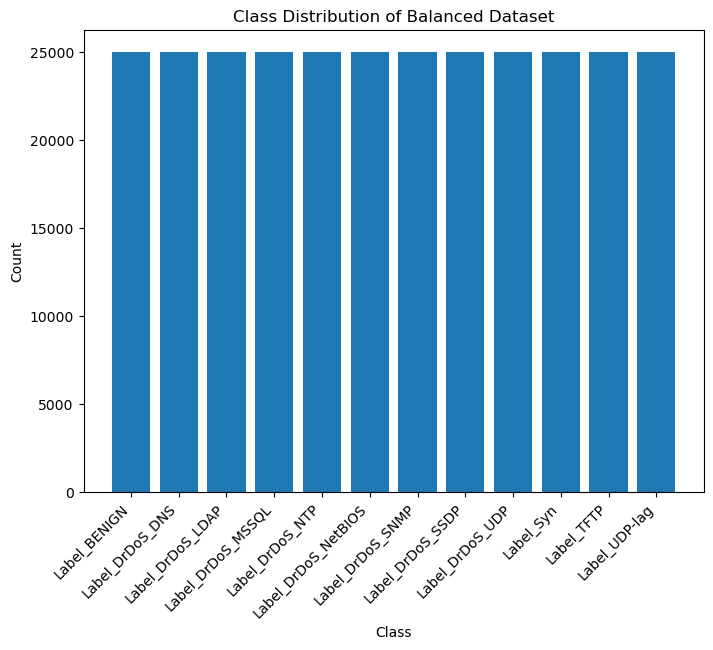

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the balanced dataset
class_counts = balanced_CICDDoS2019[target_columns].sum()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Balanced Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
balanced_CICDDoS2019.shape

(300000, 79)

In [ ]:
balanced_CICDDoS2019.to_csv(r'Dataset/Encoded Dataset/CIC-DDoS2019_multi.csv', index=False)